# Combine DIC data with X-ray in order to calculate multiaxial flow curve

- Use pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Dependents

In [2]:
import os
from glob import glob
from RS import analyze_proto
import matplotlib as mpl
import time
from MP import progress_bar, lib
mpl_lib=lib.mpl_lib
uet=progress_bar.update_elapsed_time
GS=mpl.gridspec.GridSpec

- Name of DIC files

In [3]:
date='20120720'
path='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/'
fn_DIC=os.path.join(path,date,'DIC/DIC_results.txt')
dic_dat=np.loadtxt(fn_DIC,skiprows=1).T

# Read lab note book in order to match Xray file and DIC index

In [4]:
print os.popen('ls -ls %s'%os.path.join(path,date,'Xray')).read()

total 800
8 -rw-------  1 yj  admin  1448 Mar 30 15:41 20JUL12_0002Data.txt
8 -rw-------  1 yj  admin  2985 Mar 30 15:41 20JUL12_0002Data1Phi-90.txt
8 -rw-------  1 yj  admin  2982 Mar 30 15:41 20JUL12_0002Data2Phi0.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:41 20JUL12_0002Data3Phi45.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:41 20JUL12_0002Data4Phi135.txt
8 -rw-------  1 yj  admin  1446 Mar 30 15:41 20JUL12_0005Data.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:41 20JUL12_0005Data1Phi-90.txt
8 -rw-------  1 yj  admin  2982 Mar 30 15:41 20JUL12_0005Data2Phi0.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:41 20JUL12_0005Data3Phi45.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:40 20JUL12_0005Data4Phi135.txt
8 -rw-------  1 yj  admin  1447 Mar 30 15:40 20JUL12_0006Data.txt
8 -rw-------  1 yj  admin  2983 Mar 30 15:40 20JUL12_0006Data1Phi-90.txt
8 -rw-------  1 yj  admin  2980 Mar 30 15:40 20JUL12_0006Data2Phi0.txt
8 -rw-------  1 yj  admin  2981 Mar 30 15:40 20JUL12_0006Data3Phi45.tx

- Making a fref file for Proto data analysis

In [11]:
# ------------------------------------------------------------------------
# Find suitable experimental stress factor file
# fn_sff='/Users/yj/GoogleDrive/expdat/Marciniak-X-ray-IF/YJ_BB_10times.sff'
fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/YJ_BB_10times.sff'


# ------------------------------------------------------------------------
# Refer to Laboratory notebook to match up the X-ray data filename 
# and DIC image number
DIC_XRD="""#6  20JUL12_0006.tr
#7   20JUL12_0006.tr
#74  20JUL12_0007.tr
#75  20JUL12_0007.tr
#96  20JUL12_0008.tr
#97  20JUL12_0008.tr
#115 20JUL12_0009.tr
#116 20JUL12_0009.tr
#133 20JUL12_0011.tr
#134 20JUL12_0011.tr
#148 20JUL12_0012.tr
#149 20JUL12_0012.tr
#163 20JUL12_0013.tr
#164 20JUL12_0013.tr
#176 20JUL12_0014.tr
#177 20JUL12_0014.tr
#188 20JUL12_0015.tr
#189 20JUL12_0015.tr
#200 20JUL12_0016.tr
#201 20JUL12_0016.tr
#211 20JUL12_0017.tr
#212 20JUL12_0017.tr
#222 20JUL12_0018.tr
#223 20JUL12_0018.tr
#232 20JUL12_0019.tr
#233 20JUL12_0019.tr
#242 20JUL12_0020.tr
#243 20JUL12_0020.tr
#252 20JUL12_0021.tr
#253 20JUL12_0021.tr
#261 20JUL12_0022.tr
#262 20JUL12_0022.tr
#336 20JUL12_0023.tr
#337 20JUL12_0023.tr
#389 20JUL12_0024.tr
#390 20JUL12_0024.tr"""

# ------------------------------------------------------------------------

fn_fref=fn_DIC.split('DIC')[0]+'f_fref.txt'
f_fref=open(fn_fref,'w')

f_fref.write(fn_sff)
f_fref.write('  MajorStrainColumn: 2\n')
f_fref.write('%14s %12s %12s %12s %12s %5s\n'%('filename','Exx','Eyy','Exy','Ezz','DIC'))
lines=DIC_XRD.split('\n')
inds = []; fns = []
for line in lines:
    ind,fn=line.split()
    ind=int(ind.split('#')[-1])
    fn = fn.split('.tr')[0]
    inds.append(ind); fns.append(fn)
    
    col = dic_dat[0]
    ix=np.where(col==ind)[0]
    i = int(col[ix][0]) ## dic index
    # print ix,i

    exx = dic_dat[5][ix]
    eyy = dic_dat[7][ix]
    exy = dic_dat[9][ix]
    ezz = -exx-eyy    
    f_fref.write(('%14s '+'%+11.5e '*4+'%5i \n')%(fn, exx, eyy, exy, ezz,i))


f_fref.close()
print '-----------------------------------------------------------------------------------------------------'
print fn_fref, 'has been created:\n Use it for further stress analysis'
print '-----------------------------------------------------------------------------------------------------'

-----------------------------------------------------------------------------------------------------
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120720/f_fref.txt has been created:
 Use it for further stress analysis
-----------------------------------------------------------------------------------------------------


In [6]:
print os.popen('cat %s'%os.path.join(path,date,'f_fref.txt')).read()

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/YJ_BB_10times.sff  MajorStrainColumn: 1
      filename          Exx          Eyy          Exy          Ezz   DIC
  20JUL12_0006 +4.63338e-04 +1.29111e-04 -6.74163e-05 -5.92449e-04     6 
  20JUL12_0006 +3.27743e-04 +1.80846e-04 -4.70930e-05 -5.08589e-04     7 
  20JUL12_0007 +7.66684e-03 +7.96884e-03 -9.83066e-05 -1.56357e-02    74 
  20JUL12_0007 +7.69749e-03 +7.91540e-03 -4.72525e-05 -1.56129e-02    75 
  20JUL12_0008 +1.43222e-02 +1.46176e-02 -1.33558e-04 -2.89398e-02    96 
  20JUL12_0008 +1.42230e-02 +1.46726e-02 -1.26991e-04 -2.88956e-02    97 
  20JUL12_0009 +2.09500e-02 +2.11299e-02 -4.35560e-05 -4.20799e-02   115 
  20JUL12_0009 +2.08608e-02 +2.11617e-02 -3.88112e-05 -4.20225e-02   116 
  20JUL12_0011 +2.76489e-02 +2.80564e-02 -1.29731e-04 -5.57053e-02   133 
  20JUL12_0011 +2.76687e-02 +2.79979e-02 +5.21419e-06 -5.56666e-02   134 
  20JUL12_0012 +3.45374e-02 +3.47953e-02 -1.25736e-04 -6.93327e-02   148 
  20JUL12_0012 +3.4

+ Running analyze_proto.main for the X-ray and DIC experiments to calculate
  stress/strain

In [7]:
## plastic strain of the points where the X-ray d-spacing
## were meausured are important information that is utilized over the X ray analysis.
## If, fc or fn_str are not given, the below application
## bases on the strain given in the fref file -
## the two major strain components are used with assumption
## that the sample was in 'equi-biaxial' strain.

t0=time.time()
RS=analyze_proto.main(path=os.path.join(path,date,'Xray'),
                   fn_sf=fn_sff,fref=os.path.join(path,date,'f_fref.txt'),
                   ind_plot=True)
uet(time.time()-t0)

---------------------------------------------
Strain information where SF/IG were measured
requires either fc or fn_str specified
If not the strain column in fn_sf is used,
subsequent analysis is performed by assuming
that the sample is in equibiaxial strain
---------------------------------------------


#-----------------------------------------------------#
 Interpolate SF and IG for matching with D-spacings
epsilon_vm:
[  6.23082429e-04   5.15611948e-04   1.56366521e-02   1.56133969e-02
   2.89403025e-02   2.88967659e-02   4.20800282e-02   4.20228591e-02
   5.57057968e-02   5.56669245e-02   6.93328599e-02   6.91426582e-02
   8.23066032e-02   8.24590753e-02   9.57453939e-02   9.58376837e-02
   1.08413584e-01   1.08463912e-01   1.20768740e-01   1.21204145e-01
   1.33416016e-01   1.33596931e-01   1.45788745e-01   1.46043706e-01
   1.57718611e-01   1.57971047e-01   1.69527636e-01   1.69981482e-01
   1.81597828e-01   1.82073835e-01   1.93280919e-01   1.93903140e-01
   4.00036839e-01   4

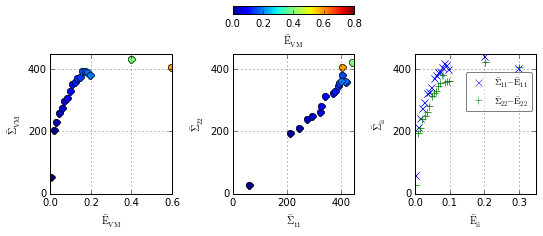

In [8]:
""" 
RS.EXP.flow.epsilon, RS.flow.sigma
"""
mn=0;mx=0.8
norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)

fx=9
fy=fx*0.35
fig=plt.figure(figsize=(fx,fy))
gs=GS(20,3,wspace=0.5)
ax1=fig.add_subplot(gs[5:,0])
ax2=fig.add_subplot(gs[5:,1])
ax3=fig.add_subplot(gs[5:,2])

nstp = RS.EXP.flow.nstp


for istp in xrange(nstp):
    c=m.to_rgba(RS.EXP.flow.epsilon_vm[istp])
    ax2.plot(RS.flow.sigma[0,0][istp],RS.flow.sigma[1,1][istp],
             'o',mec='k',mfc=c)
    ax1.plot(RS.EXP.flow.epsilon_vm[istp],RS.flow.sigma_vm[istp],'o',c=c)
# ax2.plot(RS.flow.sigma[0,0],RS.flow.sigma[1,1],'k--')

ax3.plot(RS.EXP.flow.epsilon[0,0],RS.flow.sigma[0,0],'x',label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}_{11}}$')
ax3.plot(RS.EXP.flow.epsilon[1,1],RS.flow.sigma[1,1],'+',label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}_{22}}$')


for ax in fig.axes:
    ax.set_ylim(0.,);ax.set_xlim(0.,)
    ax.locator_params(nbins=4)
    ax.grid()

ax2.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$')
ax2.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$')
ax3.set_xlabel(r'$\mathrm{\bar{E}_{ii}}$')
ax3.set_ylabel(r'$\mathrm{\bar{\Sigma}_{ii}}$')
ax1.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
ax1.set_ylabel(r'$\mathrm{\bar{\Sigma}_{VM}}$')
ax3.legend(loc='best',fontsize=9,numpoints=1,bbox_to_anchor=(1,0.9))


axcb=fig.add_subplot(gs[0,1])
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,orientation='horizontal',
                          norm=norm,filled=True,format='%3.1f')
# axcb.locator_params(nbins=4)
axcb.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
cb.set_ticks(np.linspace(mn,mx,5))
#mpl_lib.add_cb(ax=axcb,cmap=cmap, filled=True,
#               format='%5.3f',norm=norm,
#               ylab=r'$\mathrm{\bar{E}_{VM}}$')



In [10]:
import cPickle as pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

fn = os.path.join(path,date,'RS.pck')
print fn
save_object(obj=RS, filename=fn)

fn = os.path.join('../../../pickles/RS_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=RS, filename=fn)

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120720/RS.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/BB/../../../pickles/RS_20120720.pck
